In [2]:
# Inspiration of this comes from
# - https://github.com/Neumi/3D_water_depth_logger

In [30]:
from helpers import read_xyz
%matplotlib widget

# imports for plotting and triangulation
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.tri as tri
from pykrige.ok import OrdinaryKriging
import math

class DepthMap:
    def __init__(self, filename):
        self.filename = filename
        self.x, self.y, self.z = read_xyz(filename)
        self.units = ["longitude","latitude"]

    def see_range(self, range):
        fig, ax = plt.subplots()
        ax.plot(self.x, self.y, 'ko', ms=0.5)
        ax.plot(self.x[range[0]:range[1]], self.y[range[0]:range[1]], 'ro', ms=0.5)

    def select_range(self,range):
        self.x = self.x[range[0]:range[1]]
        self.y = self.y[range[0]:range[1]]
        self.z = self.z[range[0]:range[1]]
    
    def lat_lon_to_meters(self):
        # Using Spherical Pseudo-Mercator projection
        # https://wiki.openstreetmap.org/wiki/Mercator
        R =  6378137.0
        self.lon = self.x
        self.lat = self.y
        self.y = np.log(np.tan(np.pi / 4 + np.radians(self.y) / 2)) * R
        self.x = np.radians(self.x) * R
        depthmap1.x = depthmap1.x - depthmap1.x[0]
        depthmap1.y = depthmap1.y - depthmap1.y[0]
        self.units = ["x coord [m]","y coord [m]"]

    
    def set_grid(self, npts):
        self.latmin = min(self.x)
        self.latmax = max(self.x)
        self.lonmin = min(self.y)
        self.lonmax = max(self.y)

        self.xi = np.linspace(self.latmin, self.latmax, npts)
        self.yi = np.linspace(self.lonmin, self.lonmax, npts)
       
    def linear_interpolation(self):
        Xi, Yi = np.meshgrid(self.xi, self.yi)
        triang = tri.Triangulation(self.x, self.y)
        interpolator = tri.LinearTriInterpolator(triang, self.z)
        zi = interpolator(Xi, Yi)
        return zi
        
    def kriging_interpolation(self, variogram_model="linear"):
        #variogram model can be:  linear, power, gaussian, spherical, exponential, hole-effect
        uk = OrdinaryKriging(self.x, self.y, self.z, variogram_model=variogram_model)
        zi, ss = uk.execute("grid", self.xi, self.yi)
        return zi
        
    def plot_interpolation(self, zi, cmap="gist_rainbow"):
        fig, ax = plt.subplots()
        ax.contour(self.xi, self.yi, zi, levels=20, linewidths=0.2, colors='k')
        cntr1 = ax.contourf(self.xi, self.yi, zi, levels=20, cmap=cmap)  # RdBu_r

        fig.colorbar(cntr1, ax=ax, orientation="horizontal").set_label("Depth [m]")
        ax.plot(self.x, self.y, 'ko', ms=0.5)
        ax.set(xlim=(self.latmin, self.latmax), ylim=(self.lonmin, self.lonmax))
        ax.set_xlabel(self.units[0])
        ax.set_ylabel(self.units[1])
        ax.set_title("Depth Map")
        ax.ticklabel_format(useOffset=False)

        #ax.set_aspect(1 / math.cos(math.radians(60.0)))

        #plt.savefig("./images/depthmap.png", dpi=220)
        plt.show()

In [31]:
depthmap1 = DepthMap('./log-data-lowrance/Sonar_2021-10-16_13.29.36.sl2')

10503


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
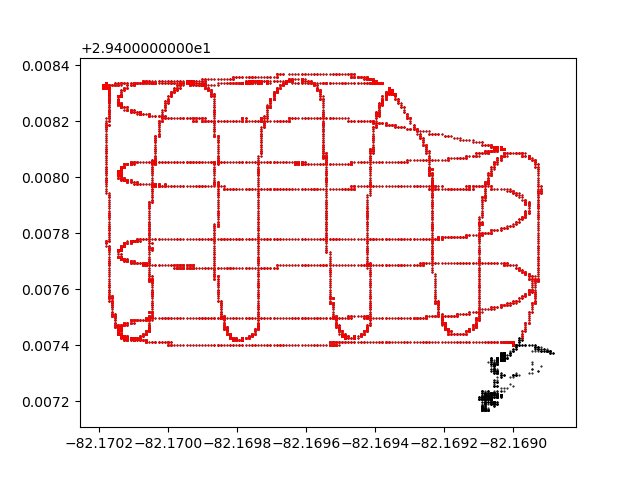

In [32]:
print(len(depthmap1.x))
range = [1500,10100] 
depthmap1.see_range(range)
depthmap1.select_range(range)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
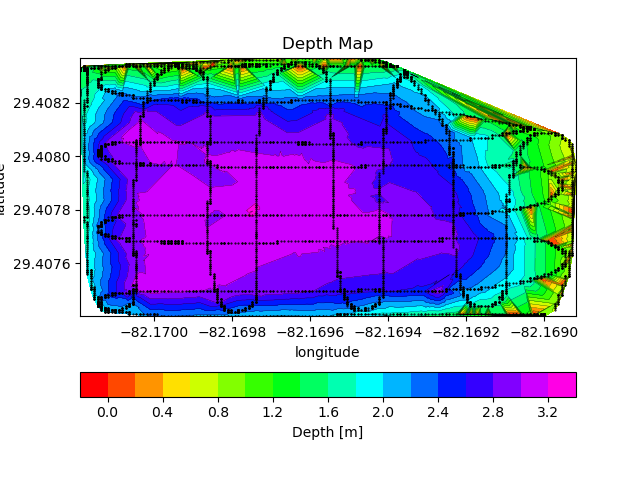

In [6]:
depthmap1.set_grid(npts=len(depthmap1.x))
zi = depthmap1.linear_interpolation()
depthmap1.plot_interpolation(zi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
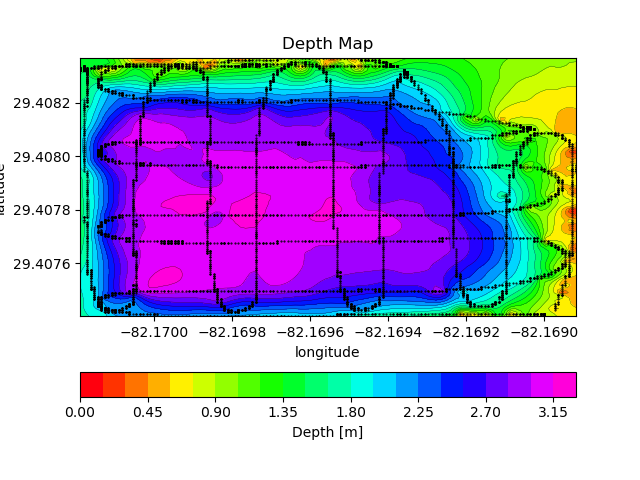

In [7]:
npts = 100
depthmap1.set_grid(npts)
zi = depthmap1.kriging_interpolation("spherical") # takes a couple of min 
depthmap1.plot_interpolation(zi)

In [33]:
depthmap1.lat_lon_to_meters()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
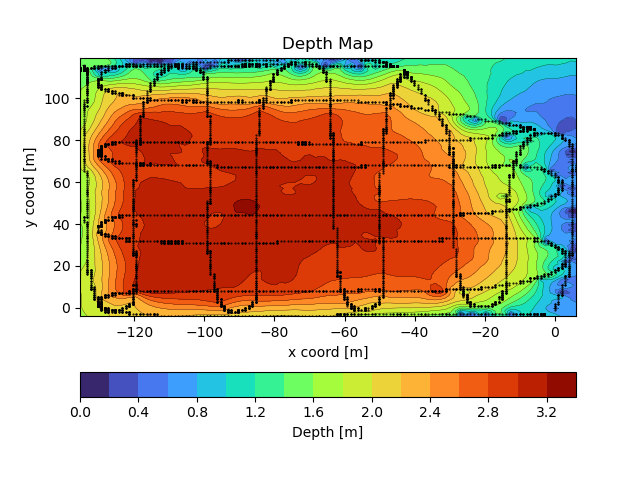

In [34]:
npts = 100
depthmap1.set_grid(npts)
zi = depthmap1.kriging_interpolation("spherical") # takes a couple of min 
depthmap1.plot_interpolation(zi, cmap="turbo")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
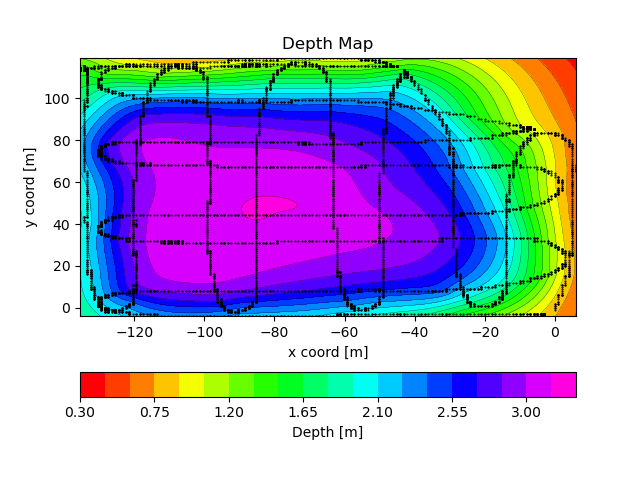

In [11]:
zi = depthmap1.kriging_interpolation("linear") # takes a couple of min 
depthmap1.plot_interpolation(zi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
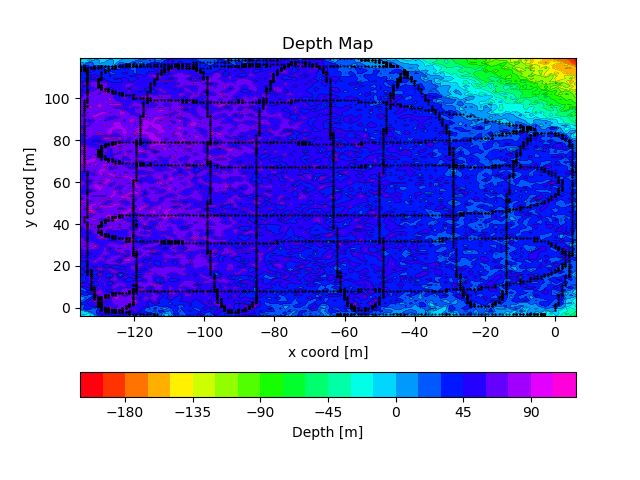

In [12]:
zi = depthmap1.kriging_interpolation("power") # takes a couple of min 
depthmap1.plot_interpolation(zi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
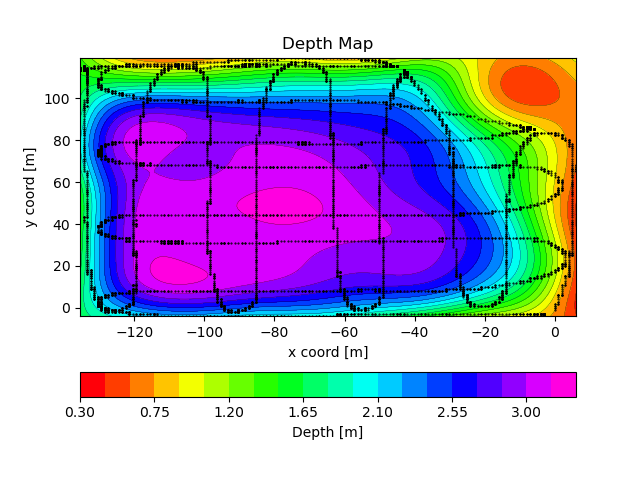

In [13]:
zi = depthmap1.kriging_interpolation("gaussian") # takes a couple of min 
depthmap1.plot_interpolation(zi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
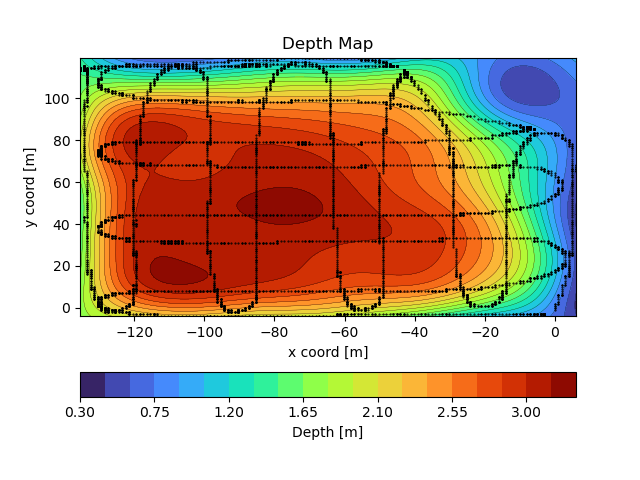

In [24]:
depthmap1.plot_interpolation(zi, cmap="turbo") 